<a href="https://colab.research.google.com/github/Iyyappan1996/DSmentors/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment5

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [107]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [108]:
iqr=df["Chirps/Second"].quantile(0.75)-df["Chirps/Second"].quantile(0.25)
lower=df["Chirps/Second"].quantile(0.75)+1.5*iqr
higher=df["Chirps/Second"].quantile(0.25)-1.5*iqr
print(lower)
print(higher)

19.699999999999996
12.9


In [109]:
x=df[["Ground Temperature"]].values
y=df["Chirps/Second"].values

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


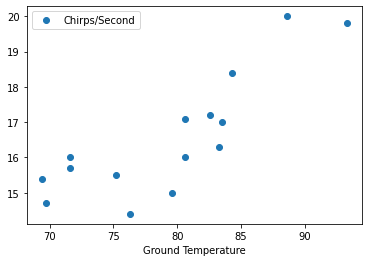

In [110]:
df.plot(x="Ground Temperature",y="Chirps/Second",style="o")
df.corr()

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
(x_train.shape,x_test.shape),((y_train.shape,y_test.shape))

(((10, 1), (5, 1)), ((10,), (5,)))

In [112]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [113]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
scalar.transform(x_train)
scalar.fit(x_test)

StandardScaler()

In [114]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.6817036885301533

In [115]:
print(Regress.coef_)
print(Regress.intercept_)

[0.16395516]
3.354938972031407


In [116]:
Regress.predict([[95]])

array([18.93067959])

In [117]:
temp=(18-(Regress.intercept_))/Regress.coef_
temp

array([89.3235726])

# **# Assignment 6**

In [118]:
df=pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [119]:
x=df[["Brain"]].values
y=df["Body"].values

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape

((43, 1), (19, 1))

In [121]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [122]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.7091513737189294

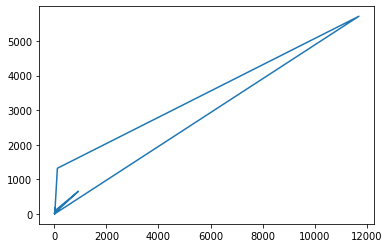

In [123]:
plt.plot(y_pred,y_test)

# ***Assignment 7***

In [124]:
df=pd.read_fwf("salary.txt",names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [125]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [126]:
features=df[["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y=df["Salary"].values

In [127]:
df[["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]].corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
x=scaler.transform(features)

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [130]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [131]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.9092266837536408